<a href="https://colab.research.google.com/github/m07amed25/ML-Learning/blob/main/Training_Potato_Diseases_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [13]:
Image_size = 256
Batch_size = 32
Channels = 3
Epochs = 50

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Potato-Diseases",
    shuffle= True,
    image_size = (Image_size, Image_size),
    batch_size = 32
)

Found 2152 files belonging to 3 classes.


In [6]:
ClassNames = dataset.class_names
print(ClassNames)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [7]:
len(dataset)

68

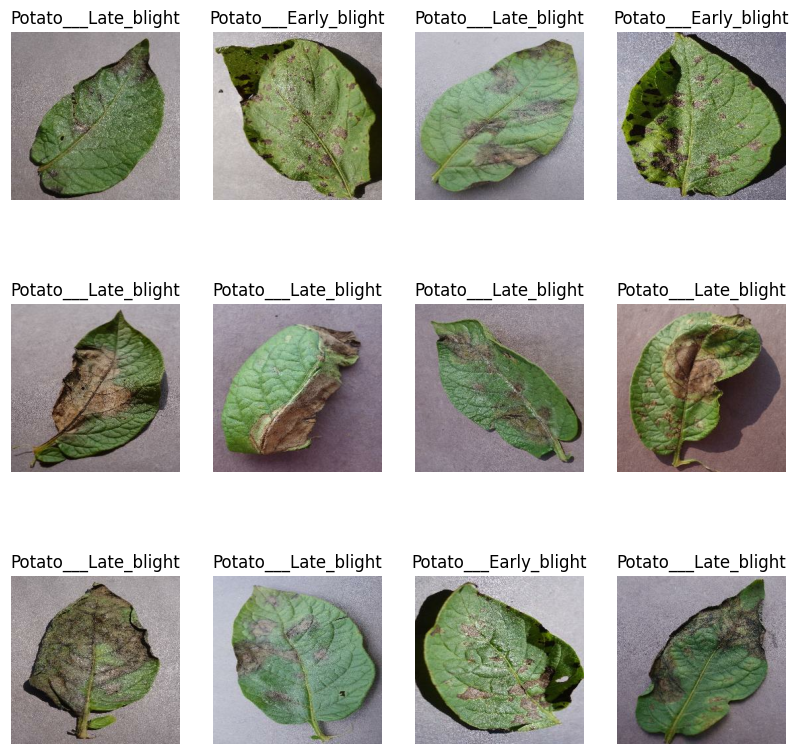

In [11]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(ClassNames[labels_batch[i]])
    plt.axis("off")

In [12]:
len(dataset)

68



> 80% ==> training

> 20% ==> 10% validation, 10% test



In [14]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [15]:
train_ds = dataset.take(54)
len(train_ds)

54

In [16]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [17]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [18]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [19]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [ ]:
def getDatasetPartitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    return train_ds, val_ds, test_ds